# Градиентный спуск.

Решается задача оптимизации:

$\min \left\{(x - \mu_0)^\top A (x - \mu_0) : \|x\|_2^2 \leq 1 \right\}$,

где $x \in \mathbb{R}^n$, $A$ - симметричная, положительно определенная матрица, $\mu_0 = \left(1, 1, \ldots, 1\right)^\top \in \mathbb{R}^n$.

Рассмотрим лучше ограничение:

$c(x) = ||x||_2^2 = \sum_{i=1}^{n} x_i^2 \leq 1$, 

где $x = (x_1, x_2, \dots, x_n)^\top \in \mathbb{R}^n$

# Исследование задачи (1) на выпуклость

Для исследования выпуклости задачи (1) мы проверим, является ли матрица $\mathbf{A}$ положительно определенной. Выпуклость целевой функции $$f(\mathbf{x}) = (\mathbf{x} - \boldsymbol{\mu}_0)^\top \mathbf{A} (\mathbf{x} - \boldsymbol{\mu}_0)$$ гарантируется, если $\mathbf{A}$ положительно определена.

Почему?

Квадратичная функция формы $ f(\mathbf{x}) = \mathbf{x}^\top \mathbf{Q} \mathbf{x} + \mathbf{b}^\top \mathbf{x} + c$
выпукла, если матрица $\mathbf{Q}$ позитивно полуопределена (PSD).

Мы знаем, что $f(\mathbf{x})$ представляет собой квадратичную форму, где $\mathbf{Q} = \mathbf{A}$, а так же по условию знаем, что $\mathbf{A}$ симметричная, положительно определенная матрица. Cледовательно: функция $x^\top Ax$ будет выпукла, а $f(\mathbf{x})$ является ее смещением на $\boldsymbol{\mu}_0$ и будет тоже выпуклой.

## Пример

In [17]:
!pip install numpy tqdm
!pip install setuptools wheel
!pip install ecos==2.0.5
!pip install -U --no-cache-dir cvxpy

  Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
from numpy.linalg import eigh

# Определение параметров
n = 3  # Размерность пространства
A = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])  # Пример симметричной положительно определенной матрицы
mu_0 = np.ones(n)

# Функция для проверки положительной определенности матрицы
def is_positive_definite(matrix):
    # Матрица положительно определена, если все её собственные значения положительны
    eigenvalues, _ = eigh(matrix)
    return np.all(eigenvalues > 0)

# Проверка, является ли A положительно определенной
is_convex = is_positive_definite(A)

print("Матрица A:\n", A)
print("Является ли задача выпуклой?", is_convex)

# Дополнительная информация о собственных значениях
eigenvalues, _ = eigh(A)
print("Собственные значения A:", eigenvalues)

Матрица A:
 [[ 2 -1  0]
 [-1  2 -1]
 [ 0 -1  2]]
Является ли задача выпуклой? True
Собственные значения A: [0.58578644 2.         3.41421356]


# Задание 2:

Для каждого значения n ∈ {10, 20, . . . , 100} сгенерируйте N = 100 тестовых примеров. В каждом случае найдите глобальный минимум, x∗ ∈ Rn, с помощью CVX. Проверьте, что в точ- ке минимума выполняется условие оптимальности (т.е. вектора градиента к ограничению и антиградиента к целевой функции сонаправлены).


## Поиск градиентов функции и ограничения

Положим $g(\mathbf{x}) = \|\mathbf{x}\|_2^2 \leq 1 $

### Для функции $ f(\mathbf{x}) $

Дано:
$$ f(\mathbf{x}) = (\mathbf{x} - \boldsymbol{\mu}_0)^\top \mathbf{A} (\mathbf{x} - \boldsymbol{\mu}_0) = $$
$$ (x^\top - \mu_0^\top)(Ax - A\mu_0) = $$
$$ x^\top Ax - x^\top A\mu_0 - \mu_0^\top Ax + \mu_0^\top A\mu_0 = $$
$$ x^\top Ax - x^\top A\mu_0 - \mu_0^\top Ax + \mu_0^\top A\mu_0 $$

где $\mu_0^\top A\mu_0$ - константа


Градиент $ f(\mathbf{x}) $ по отношению к $\mathbf{x}$:

$$ \nabla f(\mathbf{x}) = \frac{\partial x^\top}{\partial x} Ax + x^\top A \frac{\partial x}{\partial x} - \frac{\partial x^\top}{\partial x} A\mu_0 - \mu_0^\top A \frac{\partial x}{\partial x} =  $$

$$ \frac{\partial x^\top}{\partial x} A (x-\mu_0) + (x^\top - \mu_0^\top )A \frac{\partial x}{\partial x} = $$

$$[\frac{\partial x}{\partial x} = 1, \frac{\partial x^\top}{\partial x} = 1] = $$

$$A (x-\mu_0) + (x^\top - \mu_0^\top )A$$
а это одно и тоже из симметричности A, получается:

$$ \nabla f(\mathbf{x})  = 2 \mathbf{A} (\mathbf{x} - \boldsymbol{\mu}_0) $$

###  Для огранияения $ g(\mathbf{x}) $

Дано:
$$ g(\mathbf{x}) = \sum_{i=1}^{n} x_i^2 $$

Производная $ g(\mathbf{x}) $ по отношению к каждой частной производной $x_i$ равен:

$$ g'_{x_i}(\mathbf{x}) = 2 x_i $$

(остальные элементы - константы). Следовательно градиент ограничения равен:
$$ \nabla g(\mathbf{x}) = 2 \mathbf{x} $$

In [4]:
import numpy as np


def objective_function(x, mu_0, A):
    """Objective function
       f(x) = (x - mu_0)^T A (x - mu_0)
    """
    return (x - mu_0).T @ A @ (x - mu_0)

def gradient_f(x, mu_0, A):
    """
    Compute the gradient of the function f(x) = (x - mu_0).T @ A @ (x - mu_0).

    Parameters:
    x (np.ndarray): The point at which to evaluate the gradient.
    mu_0 (np.ndarray): The mean vector.
    A (np.ndarray): The matrix A.

    Returns:
    np.ndarray: The gradient of f at x.
    """
    return 2 * A @ (x - mu_0)

def gradient_g(x):
    """
    Compute the gradient of the constraint g(x) = ||x||_2^2 <= 1.

    Parameters:
    x (np.ndarray): The point at which to evaluate the gradient.

    Returns:
    np.ndarray: The gradient of g at x.
    """
    return 2 * x

def project_to_unit_ball(x):
    """Projects a vector onto the unit ball.
    """
    norm = np.linalg.norm(x, 2)
    if norm > 1:
        return x / norm
    return x

def check_is_optimal(x_star, mu_0, A):

    gradient_objective = project_to_unit_ball(gradient_f(x_star, mu_0, A))
    gradient_constrait  = project_to_unit_ball(gradient_g(x_star))
    if np.linalg.norm(gradient_objective + gradient_constrait) < 1e-4 and np.linalg.norm(x_star.astype(np.float32), 2) <= 1:
        return True
    return False

def create_A_mu0_matrix(n):
    A = np.random.randn(n, n)
    A = A @ A.T
    mu_0 = np.ones(n)
    return A, mu_0

In [111]:
import numpy as np
import cvxpy as cp

# Function to generate test cases and solve the optimization problem
def solve_optimization(n):
    # Generate random matrix A (positive semidefinite)

    A, mu_0 = create_A_mu0_matrix(n)

    assert np.allclose(A, A.T), "Matrix A must be symmetric"
    assert is_positive_definite(A), "Matrix A must be positive semi-definite"
    assert A.shape[0] == mu_0.shape[0], "Matrix A and vector mu_0 must be the same size"

    # Define the optimization variable
    x = cp.Variable(n)

    # Wrap the matrix A to ensure it is treated as PSD
    A_psd = cp.psd_wrap(A)

    # Define the objective function
    objective = cp.Minimize(cp.quad_form(x - mu_0, A_psd))

    # Define the constraint
    constraint = [cp.sum_squares(x) <= 1]

    # Define the problem
    problem = cp.Problem(objective, constraint)

    # Solve the problem
    problem.solve(cp.SCS, eps=1e-9)

    # Get the optimal value and optimal point
    x_star = x.value
    f_star = problem.value

    # Check optimality condition
    optimality_condition = check_is_optimal(x_star, mu_0, A)
    
    return x_star, f_star, optimality_condition

# Main loop to generate test cases and solve the problem for each n
results = {}
for n in range(10, 101, 10):
    optimality_checks = []
    for _ in range(100):
        x_star, f_star, optimality_condition = solve_optimization(n)
        optimality_checks.append(optimality_condition)
    results[n] = {
        "optimality_checks": optimality_checks,
        "all_checks_passed": all(optimality_checks)
    }

# Print results
for n, result in results.items():
    print(f"n = {n}: All checks passed = {result['all_checks_passed']}")


n = 10: All checks passed = True
n = 20: All checks passed = True
n = 30: All checks passed = True
n = 40: All checks passed = True
n = 50: All checks passed = True
n = 60: All checks passed = True
n = 70: All checks passed = True
n = 80: All checks passed = True
n = 90: All checks passed = True
n = 100: All checks passed = True


# Задание 3. Метод градиентного спуска с использованием Exact line search

In [11]:
from tqdm import tqdm
import time
import json

def get_exact_line_alpha(x, A, mu, delta_x, max_s: float = 1., step_s: float = 0.001) -> float:
    s_values = np.arange(0, max_s, step_s)
    func_results = [objective_function(x - s * delta_x, mu, A) for s in s_values]

    min_index = np.argmin(func_results)
    optimal_s = s_values[min_index]

    return optimal_s

def exact_line_search(x_init, mu_0, A, epsilon=0.01, max_s: float = 1., step_s: float = 0.001, max_iterations = 1000000):
    by_epsilon = False
    x = x_init

    for i in range(1, max_iterations + 1):

        direction = gradient_f(x, mu_0, A)
        step_size = get_exact_line_alpha(x, A, mu_0, direction, max_s, step_s)
        # print(np.linalg.norm(direction), step_size)
        if np.linalg.norm(direction) < epsilon or step_size == 0:
            by_epsilon = True
            break

        x = x - step_size * direction
    return x, by_epsilon, i, np.linalg.norm(direction)

def generate_results_by_els():
    results = {}

    with open("../results_copy.json") as f:
        results = json.load(f)
        
    for n in range(70, 101, 10):
        results[n] = []
        for sample in range(1):
            A, mu_0 = create_A_mu0_matrix(n)
            results[n].append({
                "sample_id": sample,
                "A_matrix": A.tolist(),
                "init_point_exps": []
            })
            print(f"n = {n}")

            assert np.allclose(A, A.T), "Matrix A must be symmetric"
            assert is_positive_definite(A), "Matrix A must be positive semi-definite"
            assert A.shape[0] == mu_0.shape[0], "Matrix A and vector mu_0 must be the same size"

            for _ in tqdm(range(100)):
                start_time = time.time() # Generate 100 initial points for each n
                x_init = np.random.random(n)

                x_opt, by_epsilon, i, accuracy  = exact_line_search(x_init, mu_0, A)

                results[n][sample]["init_point_exps"].append({
                    "x_opt": x_opt.tolist(),
                    "by_epsilon": by_epsilon,
                    "time": time.time() - start_time,
                    "iterations": i,
                    "accuracy": accuracy,
                    "x_init": x_init.tolist()
                })

                with open("results.json", "w") as f:
                    json.dump(results, f)

    return results

In [10]:
results = generate_results_by_els()

n = 10


100%|██████████| 100/100 [01:21<00:00,  1.22it/s]


n = 10


100%|██████████| 100/100 [01:55<00:00,  1.15s/it]


n = 10


100%|██████████| 100/100 [01:17<00:00,  1.29it/s]


n = 20


100%|██████████| 100/100 [04:27<00:00,  2.67s/it]


n = 20


100%|██████████| 100/100 [01:24<00:00,  1.19it/s]


n = 20


100%|██████████| 100/100 [04:31<00:00,  2.71s/it]


n = 30


100%|██████████| 100/100 [11:04<00:00,  6.65s/it]


n = 30


100%|██████████| 100/100 [02:38<00:00,  1.59s/it]


n = 30


100%|██████████| 100/100 [06:12<00:00,  3.72s/it]


n = 40


100%|██████████| 100/100 [12:46<00:00,  7.66s/it]


n = 40


100%|██████████| 100/100 [06:02<00:00,  3.63s/it]


n = 40


100%|██████████| 100/100 [05:38<00:00,  3.39s/it]


n = 50


100%|██████████| 100/100 [07:43<00:00,  4.63s/it]


n = 50


100%|██████████| 100/100 [33:33<00:00, 20.14s/it]


n = 50


100%|██████████| 100/100 [11:22<00:00,  6.82s/it]


n = 60


100%|██████████| 100/100 [24:31<00:00, 14.71s/it]


n = 60


 10%|█         | 10/100 [02:51<25:46, 17.18s/it]


KeyboardInterrupt: 

In [12]:
results = generate_results_by_els()

n = 70


100%|██████████| 100/100 [10:58<00:00,  6.59s/it]


n = 80


100%|██████████| 100/100 [13:00<00:00,  7.81s/it]


n = 90


100%|██████████| 100/100 [15:11<00:00,  9.11s/it]


n = 100


 19%|█▉        | 19/100 [30:22<2:09:30, 95.93s/it] 


KeyboardInterrupt: 

# Метод точного линейного поиска (Exact Line Search)

## Принцип работы метода

Метод точного линейного поиска заключается в нахождении оптимального значения шага $\alpha$ в направлении антиградиента для минимизации целевой функции на каждом этапе итеративного процесса. Алгоритм можно описать следующими шагами:



1.   **Инициализация**: Выбирается начальная точка $\mathbf{x}_0$.
2.   **Вычисление градиента**: Определяется градиент целевой функции $\nabla f(\mathbf{x}_k)$ в текущей точке $\mathbf{x}_k$.
3.   **Определение направления**: Выбирается направление антиградиента $\mathbf{d}_k = \nabla f(\mathbf{x}_k)$.
4.   **Линейный поиск**: Решается подзадача минимизации вдоль направления $\mathbf{d}_k$: $$ \alpha_k = \arg \min_{\alpha} f(\mathbf{x}_k - \alpha \mathbf{d}_k) $$
5. **Обновление точки**: Определяется новая точка $\mathbf{x}_{k+1} = \mathbf{x}_k - \alpha_k \mathbf{d}_k$.
6. **Проверка условия остановки**: Если $|\nabla f(\mathbf{x}_{k+1})|$ меньше заданного порога $\epsilon$ или шаг обновления (step_size) равен 0, алгоритм останавливается. В противном случае возвращаемся к шагу 2.

## Преимущества метода

*   **Точность**: Метод обеспечивает точный выбор шага
$\alpha$, что может способствовать более быстрым сходимостям к оптимуму.
*   **Эффективность на квадратичных функциях**: Для квадратичных функций метод точного линейного поиска может быстро находить оптимальные решения.


## Недостатки метода

*   Точный линейный поиск требует решения подзадачи оптимизации на каждом шаге, что может быть вычислительно затратным.

*   Реализация метода требует дополнительных вычислений и может быть сложнее по сравнению с методами с фиксированным шагом.

*   На неконвексных функциях метод может застревать в локальных минимумах, так как линейный поиск оптимизирует только вдоль одного направления.



# Выводы

In [13]:
with open("../results_copy.json") as f:
    data_results = json.load(f)

In [20]:
times_per_n = {}
iterations_per_n = {}

for n, samples in data_results.items():
    times = []
    iterations = []
    for sample in samples:
        exps = sample["init_point_exps"]
        for el in exps:
            times.append(el["time"])
            iterations.append(el["iterations"])

    times_per_n[n] = times
    iterations_per_n[n] = iterations


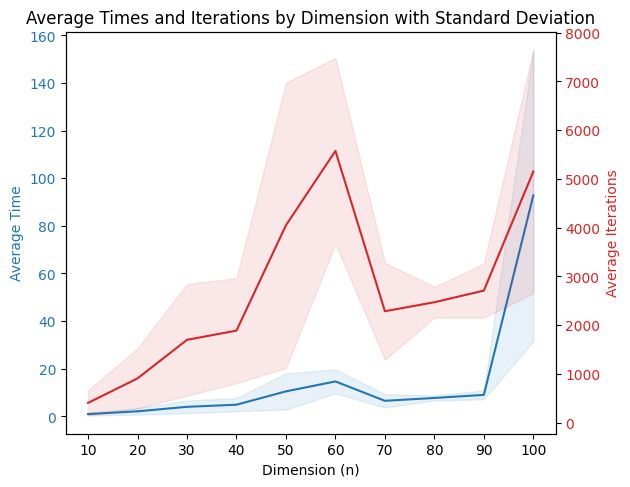

In [25]:
import matplotlib.pyplot as plt
# Prepare lists for plotting
ns = times_per_n.keys()
average_times = []
std_times = []
average_iterations = []
std_iterations = []

for n in times_per_n.keys():
    # print(n)
    # Calculating mean and std for times
    mean_time = np.mean(times_per_n[n])
    std_time = np.std(times_per_n[n])
    average_times.append(mean_time)
    std_times.append(std_time)

    # Calculating mean and std for iterations
    mean_iterations = np.mean(iterations_per_n[n])
    std_iter = np.std(iterations_per_n[n])
    average_iterations.append(mean_iterations)
    std_iterations.append(std_iter)

# Plotting
fig, ax1 = plt.subplots()

# Axis 1 - Times
color = 'tab:blue'
ax1.set_xlabel('Dimension (n)')
ax1.set_ylabel('Average Time', color=color)
ax1.plot(ns, average_times, color=color)
ax1.fill_between(ns, np.array(average_times) - np.array(std_times), np.array(average_times) + np.array(std_times), color=color, alpha=0.1)
ax1.tick_params(axis='y', labelcolor=color)

# Axis 2 - Iterations
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Average Iterations', color=color)  # we already handled the x-label with ax1
ax2.plot(ns, average_iterations, color=color)
ax2.fill_between(ns, np.array(average_iterations) - np.array(std_iterations), np.array(average_iterations) + np.array(std_iterations), color=color, alpha=0.1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Average Times and Iterations by Dimension with Standard Deviation')
plt.show()

Видно, что время, как и число итераций имеет тенденцию на рост. Однако по числу итераций заметно, что до n=60 был равномерный рост, а в районе 70 был спад. На это могло повлиять то, что в этот момент процесс был остановлен и запущен заново. Так же в виду долгого вычисления 100 примеров на 100 начальных точек = 10000 запусков на одну размерность было принято решение с 10 до 60 генерировать только 3 примера, а с 70 до 100 только 1.

In [29]:
data_results[10].keys()

KeyError: 10

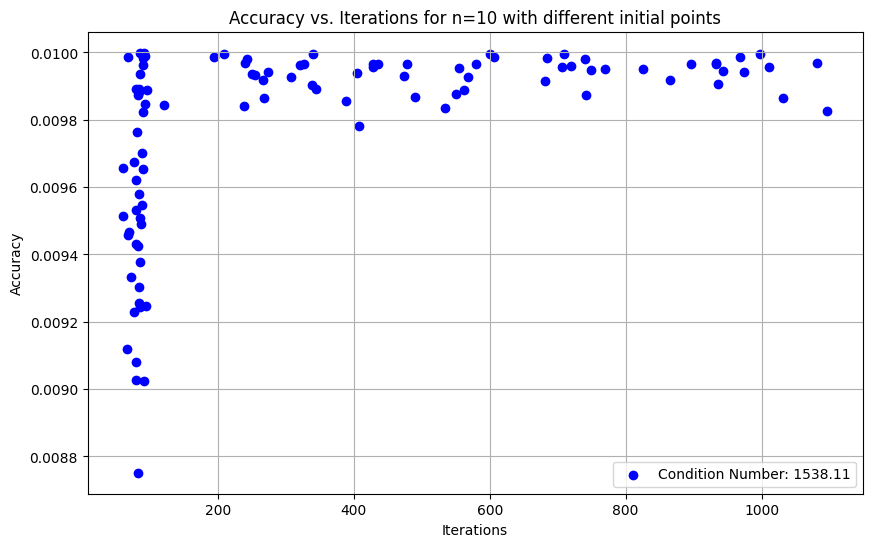

In [30]:
A = np.array(data_results["10"][0]['A_matrix'])
eigenvalues = np.linalg.eigvals(A)
condition_number = np.max(eigenvalues) / np.min(eigenvalues)

# Prepare the data for plotting
iterations = [exp['iterations'] for exp in data_results["10"][0]['init_point_exps']]
accuracies = [exp['accuracy'] for exp in data_results["10"][0]['init_point_exps']]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(iterations, accuracies, color='b', label=f'Condition Number: {condition_number:.2f}')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iterations for n=10 with different initial points')
plt.legend()
plt.grid(True)
plt.show()

Видно что на совсем малом числе итераций удается достич более лучших показателей точности, в то время как на большем числе итераций значения близки к эпсилон.

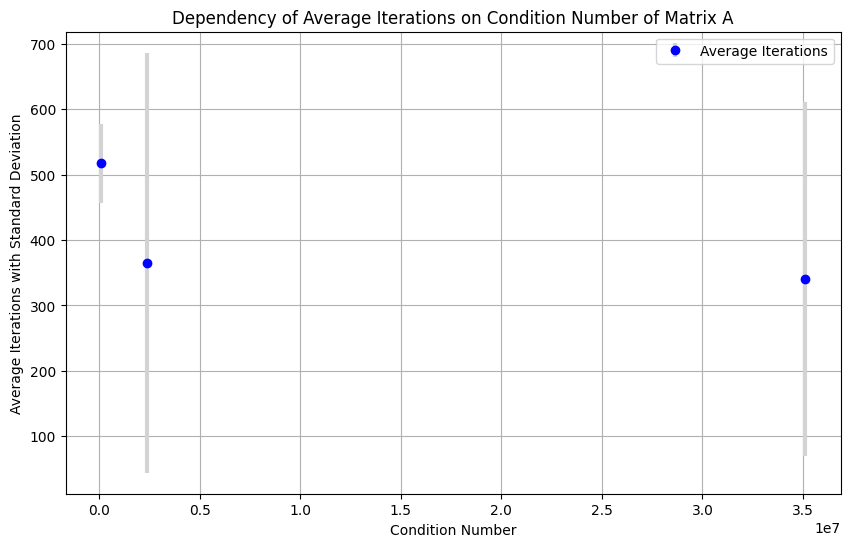

In [32]:
data_n10 = data_results["10"]

tests = []

for idx, dataset in enumerate(data_n10):
    A = np.array(dataset['A_matrix'])
    iterations = [exp["iterations"] for exp in dataset["init_point_exps"]]

    tests.append({
        "A_matrix" : A,
        "iterations": iterations
    })

# Prepare lists for plotting
condition_numbers = []
average_iterations = []
std_iterations = []

for dataset in tests:
    A = np.array(dataset['A_matrix'])
    A = A @ A.T  # Ensure the matrix is symmetric and positive semi-definite
    eigenvalues = np.linalg.eigvals(A)
    condition_number = np.max(np.abs(eigenvalues)) / np.min(np.abs(eigenvalues))

    condition_numbers.append(condition_number)
    average_iterations.append(np.mean(dataset['iterations']))
    std_iterations.append(np.std(dataset['iterations']))

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(condition_numbers, average_iterations, yerr=std_iterations, fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0, label='Average Iterations')
plt.title('Dependency of Average Iterations on Condition Number of Matrix A')
plt.xlabel('Condition Number')
plt.ylabel('Average Iterations with Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

Значимой зависимости не наблюдается, разве что есть небольшое уменьшение с увеличением значения.